<a href="https://colab.research.google.com/github/1337Rinz/Deeplearning/blob/main/LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import os

In [8]:
import requests

url = "https://raw.githubusercontent.com/1337Rinz/DATA_for_machine_learning/main/wonderland.txt"
response = requests.get(url)
raw_text = response.text

In [9]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
print('number of letters: ', len(char_to_int))
print(char_to_int)

number of letters:  72
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '0': 11, '3': 12, ':': 13, ';': 14, '?': 15, 'A': 16, 'B': 17, 'C': 18, 'D': 19, 'E': 20, 'F': 21, 'G': 22, 'H': 23, 'I': 24, 'J': 25, 'K': 26, 'L': 27, 'M': 28, 'N': 29, 'O': 30, 'P': 31, 'Q': 32, 'R': 33, 'S': 34, 'T': 35, 'U': 36, 'V': 37, 'W': 38, 'X': 39, 'Y': 40, 'Z': 41, '[': 42, ']': 43, '_': 44, '`': 45, 'a': 46, 'b': 47, 'c': 48, 'd': 49, 'e': 50, 'f': 51, 'g': 52, 'h': 53, 'i': 54, 'j': 55, 'k': 56, 'l': 57, 'm': 58, 'n': 59, 'o': 60, 'p': 61, 'q': 62, 'r': 63, 's': 64, 't': 65, 'u': 66, 'v': 67, 'w': 68, 'x': 69, 'y': 70, 'z': 71}


In [11]:
import string
string.ascii_lowercase
# string.digits
# string.punctuation
chars_new = list(string.ascii_lowercase) + ['0', '.', ',', ' ', '!', '?', 'unk']
chars_to_int = dict((v, k) for k, v in enumerate(chars_new))
int_to_chars = dict((k, v) for k, v in enumerate(chars_new))
print('character to int:', chars_to_int)
print('int to character:', int_to_chars)
# def _clean_char(text):
#     return 1

character to int: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '0': 26, '.': 27, ',': 28, ' ': 29, '!': 30, '?': 31, 'unk': 32}
int to character: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '.', 28: ',', 29: ' ', 30: '!', 31: '?', 32: 'unk'}


In [12]:
n_chars = len(raw_text)
n_vocab = len(chars_new)
print('Total characters: ', n_chars)
print('Total Vocab: ', n_vocab)

Total characters:  148575
Total Vocab:  33


In [13]:
def _encode_sen(text):
    text = text.lower()
    sen_vec = []
    for let in text:
        if let in chars_new[:-1]:
            idx = chars_to_int[let]
        else:
            idx = chars_to_int['unk']
        sen_vec.append(idx)
    return sen_vec

x_test = _encode_sen('Alice is a wonderful story. #')
print(x_test)

[0, 11, 8, 2, 4, 29, 8, 18, 29, 0, 29, 22, 14, 13, 3, 4, 17, 5, 20, 11, 29, 18, 19, 14, 17, 24, 27, 29, 32]


In [15]:
def _decode_sen(vec):
    text = []
    for i in vec:
        let = int_to_chars[i]
        text.append(let)
    text = ''.join(text)
    return text

_decode_sen(x_test)

'alice is a wonderful story. unk'

In [16]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    # Lấy ra 100 kí tự liền trước
    seq_in = raw_text[i:i + seq_length]
    # Lấy ra kí tự liền sau 100 kí tự đó
    seq_out = raw_text[i + seq_length]
    dataX.append(_encode_sen(seq_in))
    dataY.append(_encode_sen(seq_out)[0])
    n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  148475


In [17]:
# reshape X to be [samples, time steps, features]
X_train = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X_train = X_train / float(n_vocab)
# one hot encode the output variable
y_train = np_utils.to_categorical(dataY)
print('X [samples, time steps, features] shape: ', X_train.shape)
print('Y shape: ', y_train.shape)

X [samples, time steps, features] shape:  (148475, 100, 1)
Y shape:  (148475, 33)


In [18]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


([<matplotlib.axis.XTick at 0x7f7960e56220>,
 [Text(0, 0, 'a'),
  Text(1, 0, 'b'),
  Text(2, 0, 'c'),
  Text(3, 0, 'd'),
  Text(4, 0, 'e'),
  Text(5, 0, 'f'),
  Text(6, 0, 'g'),
  Text(7, 0, 'h'),
  Text(8, 0, 'i'),
  Text(9, 0, 'j'),
  Text(10, 0, 'k'),
  Text(11, 0, 'l'),
  Text(12, 0, 'm'),
  Text(13, 0, 'n'),
  Text(14, 0, 'o'),
  Text(15, 0, 'p'),
  Text(16, 0, 'q'),
  Text(17, 0, 'r'),
  Text(18, 0, 's'),
  Text(19, 0, 't'),
  Text(20, 0, 'u'),
  Text(21, 0, 'v'),
  Text(22, 0, 'w'),
  Text(23, 0, 'x'),
  Text(24, 0, 'y'),
  Text(25, 0, 'z'),
  Text(26, 0, '0'),
  Text(27, 0, '.'),
  Text(28, 0, ','),
  Text(29, 0, ' '),
  Text(30, 0, '!'),
  Text(31, 0, '?'),
  Text(32, 0, 'unk')])

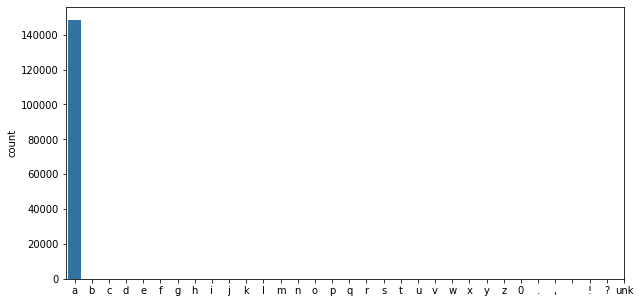

In [21]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sn.countplot(np.array(dataY))
plt.xticks(np.arange(33),np.array(chars_new))

In [27]:
#LSTM
model = Sequential()
model.add(LSTM(256, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 33)                8481      
                                                                 
Total params: 272,673
Trainable params: 272,673
Non-trainable params: 0
_________________________________________________________________


In [28]:
filepath = 'weights-improvement-{epoch:02d}-{loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]

In [29]:
model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_split=0.33, callbacks = callback_list, verbose = 1)

Epoch 1/5
778/778 [==============================] - ETA: 0s - loss: 2.8765 - accuracy: 0.1972

778/778 [==============================] - 703s 900ms/step - loss: 2.8765 - accuracy: 0.1972 - val_loss: 2.7866 - val_accuracy: 0.1942
Epoch 2/5
778/778 [==============================] - ETA: 0s - loss: 2.7287 - accuracy: 0.2196

778/778 [==============================] - 698s 897ms/step - loss: 2.7287 - accuracy: 0.2196 - val_loss: 2.6851 - val_accuracy: 0.2361
Epoch 3/5
778/778 [==============================] - ETA: 0s - loss: 2.6446 - accuracy: 0.2459

778/778 [==============================] - 688s 884ms/step - loss: 2.6446 - accuracy: 0.2459 - val_loss: 2.6183 - val_accuracy: 0.2520
Epoch 4/5
778/778 [==============================] - ETA: 0s - loss: 2.5897 - accuracy: 0.2602

778/778 [==============================] - 697s 897ms/step - loss: 2.5897 - accuracy: 0.2602 - val_loss: 2.5715 - val_accuracy: 0.2622
Epoch 5/5
778/778 [==============================] - ETA: 0s - loss: 2.5349 - accuracy: 0.2763

778/778 [==============================] - 692s 889ms/step - loss: 2.5349 - accuracy: 0.2763 - val_loss: 2.5342 - val_accuracy: 0.2772


In [30]:
import numpy as np
base_word = 'Alice was beginning to get very tired of sitting by her sister on the bank'

def _predict_let(text, len_sen = 1):
    text_for = []
    for i in range(len_sen):
        x_input = np.array(_encode_sen(text)[-100:])/float(n_vocab)
        if x_input.shape[0] < 100:
            x_input = np.concatenate((np.zeros(100-x_input.shape[0]), x_input), axis = 0)
        x_input = np.expand_dims(np.expand_dims(x_input, -1), 0)
        y_prob = model.predict(x_input)
        y_let = int_to_chars[np.argmax(y_prob, axis = 1)[0]]
        text = text + y_let
    return text[len_sen:]

_predict_let(base_word, 100)

1/1 [==============================] - 0s 33ms/step


'  shi  au toen the  an  ou  and the  an  ou  and the  an  ou  and the  an '